# Diffusion Equation in a Bar
## Zaki Salma 18012088

## Steady State Heat

The steady state diffusion of heat in a bar is given by the stationary/eliptic partial differential equation in two dimension:

$$\frac{\partial^2 \theta}{\partial x^2} + \frac{\partial^2 \theta}{\partial y^2} = 0 \space\space\space\space\space(1.0)$$ 

applying a centred finite differences scheme, with notation $\theta (x_i,y_j) = \theta_{ij}$,

$$\frac{\theta_{i+1,j}-2\theta_{i,j}+\theta_{i-1,j}}{\Delta x^2} + \frac{\theta_{i,j+1}-2\theta i_{i,j}+\theta_{i,j-1}}{\Delta y^2} = 0\space\space\space\space\space(2.0)$$

Applying simplification $\Delta x = \Delta y$ and re-arranging,

$$\theta_{i,j}^{(k+1)} =\frac{1}{4}\left(\theta_{i+1,j}^{(k)}+\theta_{i-1,j}^{(k)}+\theta_{i,j+1}^{(k)}+\theta_{i,j-1}^{(k)}\right)\space\space\space\space\space(3.0)$$

where the superscript implies iteration over each element, further refinement can be obtained by incorporating a new term $\omega$,

$$\theta_{i,j}^{(k+1)} =\left(\frac{1+\omega}{4}\right)(\theta_{i+1,j}^{(k)}+\theta_{i-1,j}^{(k)}+\theta_{i,j+1}^{(k)}+\theta_{i,j-1}^{(k)}) - \omega\theta_{i,j}^{(k)}\space\space\space\space\space(4.0)$$

This acts to stabalize the solution by 'mixing' prior and updated terms by some parameter $0<\omega<1$.

The first part of this investigation will be focussing on searching for a solution for the steady state 2D diffusion equation above by method of successive over-relaxtion/Gauss-Seidel iteration (eqn 4.0).

## The system

The system that will be investigated is a bar with length 21m and width 15m. The temperature is held at 400 $^{\circ}$C at y = 21m and the temperature is held at 300 $^{\circ}$C at y = 0, x = 0 and x = 15

In [1]:
#Importing relavent modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def update_GS_SOR(theta, M, N, omega):
    """
    Updates MxN grid of points using SOR and Gaus/Seidel method
    
    Inputs: theta - Grid of points to be updated ; M/N : Dimensions of grid ; omega: Additional parameter
    
    Output: theta - Updated grid
    
    """
    #Iterates from end where there is a difference from boundary condition 
    for i in range(M-2,0,-1):
        for j in range(N-2,0,-1):
            #Equation 4.0
            theta[i,j] = 0.25*(1.0+omega)*(theta[i-1,j] + theta[i+1,j]
                                         + theta[i,j-1] + theta[i,j+1]) - omega*theta[i,j]
    return theta

Finished after  65  iterations


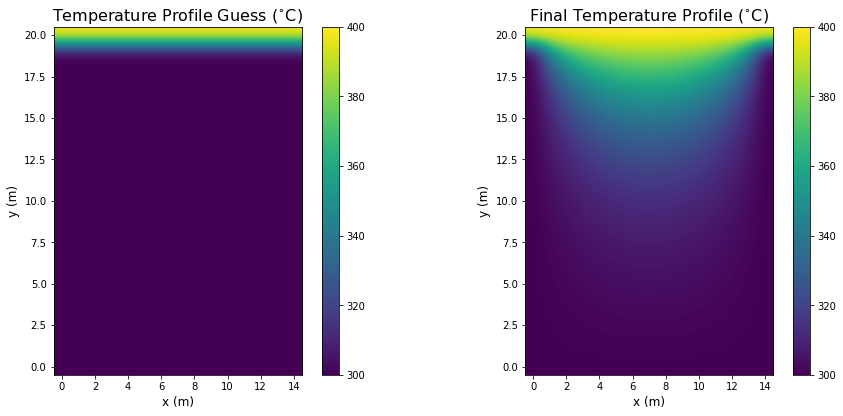

In [3]:
#Dimensions
M = 21 
N = 15
#Temperatures
T1 = 300
T2 = 400

#Creates Grid
theta = T1 * np.ones((M,N))
theta[-1] = T2

theta_initial = np.copy(theta)

#Parameters and tolerance
omega = 0.5
delta = 1.0
tol   = 1e-3
n = 1

#Loops while difference between updated elements is sufficiently small
while  delta>tol:
    thetain = np.copy(theta)
    theta = update_GS_SOR(theta,M,N,omega)
    delta = np.max(np.abs(thetain - theta))
    n += 1
#Output number of iterations
print("Finished after ",n," iterations")

fig = plt.figure(figsize=(6.4,6.4))

#Plot initial guess
ax1 = fig.add_subplot(121)
ax1.set_title( r'Temperature Profile Guess ($^{\circ}$C)',fontdict = {'size':16})
ax1.set_xlabel('x (m)',fontdict = {'size':12})
ax1.set_ylabel('y (m)',fontdict = {'size':12})
im1 = ax1.imshow(theta_initial, interpolation = 'bicubic', origin = 'lower')
plt.colorbar(im1,ax=ax1)

#Plot Final solution
ax2 = fig.add_subplot(122)
ax2.set_title( r'Final Temperature Profile ($^{\circ}$C)',fontdict = {'size':16})
ax2.set_xlabel('x (m)',fontdict = {'size':12})
ax2.set_ylabel('y (m)',fontdict = {'size':12})
im2 = ax2.imshow(theta, interpolation = 'bicubic', origin = 'lower')
plt.colorbar(im2,ax=ax2)

plt.subplots_adjust(right = 2)

Smaller values of $\omega$ requires more iterations to a solution for the same tolerance.

## Time Varying Heat

Now considering the temperature as a function of $x$, $y$ and $t$,

$$\frac{\partial^2 \theta}{\partial x^2} + \frac{\partial^2 \theta}{\partial y^2} = \frac{\partial \theta}{\partial t} \space\space\space\space\space(5.0)$$ 

This equation varies in time so it is no longer stationary ; It shows the transport process of heat transfer over time (Parabolic equation).

Using the same notation as for SS diffusion, the time derivative can be written as,

$$\left(\frac{\partial \theta}{\partial t}\right)_{i,j,n} \simeq \frac{\theta _{i,j,n+1}-\theta_{i,j,n}}{\Delta t}\space\space\space\space\space(6.0)$$

with $i$ and $j$ being the $x$ and $y$ steps respectively and $n$ being the time step. 

Expressing both positional derivatives as centred differences at $(i,j,n)$ and substituting into $(5.0)$, 

$$\frac{\theta_{i+1,j,n}-2\theta_{i,j,n}+\theta_{i-1,j,n}}{\Delta x^2} + \frac{\theta_{i,j+1,n}-2\theta i_{i,j,n}+\theta_{i,j-1,n}}{\Delta y^2} = \frac{\theta _{i,j,n+1}-\theta_{i,j,n}}{\Delta t}\space\space\space\space\space(7.0)$$


Re-arranging,

$$\theta _{i,j,n+1}^{(k+1)} = \theta_{i,j,n}^{(k)} + \zeta\left(\theta_{i+1,j,n}^{(k)}+\theta_{i-1,j,n}^{(k)} +\theta_{i,j+1,n}^{(k)}+\theta_{i,j-1,n}^{(k)} -4\theta_{i,j,n}^{(k)}\right)$$

with $\zeta = \frac{\Delta t}{\Delta x^2} = \frac{\Delta t}{\Delta y^2}$.

Now Updating is done over time as shown by the increment in the $n$ subscript

In [4]:
def update_temperature2D(temper, M, N, zeta):
    """
    Perform explicit forward FD update for heat equation
    
    Inputs: temper - Array of temperatures at present timestep ; n - Temperature timestep to calculate ; 
            zeta -  Constant of proportionality
            
    Outputs: temper_next - Array of temperatures at next time step
    """
    temper_next = np.copy(temper)
    
    for i in range(1,M-1): 
        for j in range(1,N-1):
            temper_next[i,j] = temper[i,j] + zeta*(temper[i+1][j]+temper[i-1][j]+temper[i][j+1]+temper[i][j-1]-4*temper[i][j])
    return temper_next

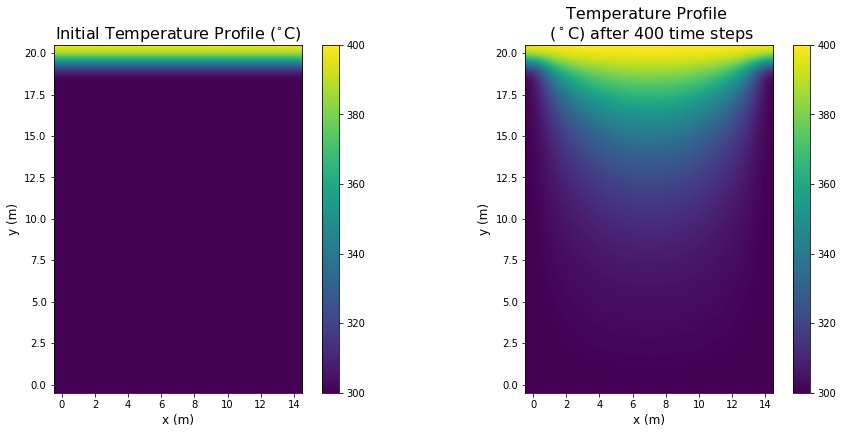

In [5]:
# Dimensions
M = 21
N = 15
#Temperatures
T1 = 300 
T2 = 400

#Creates Grid
theta0 = T1*np.ones((M,N))
theta0[-1] = T2

theta0_initial = np.copy(theta0)

#Parameters
Nt = 400
zeta = 0.1

#Updates theta0 by Nt time steps
for i in range(Nt):
    theta_next = update_temperature2D(theta,M,N,zeta)
    theta0 = theta_next

fig = plt.figure(figsize=(6.4,6.4)) 

#Plot initial guess
ax1 = fig.add_subplot(121)
ax1.set_title( r'Initial Temperature Profile ($^{\circ}$C)',fontdict = {'size':16})
ax1.set_xlabel('x (m)',fontdict = {'size':12})
ax1.set_ylabel('y (m)',fontdict = {'size':12})
im1 = ax1.imshow(theta0_initial, interpolation = 'bicubic' ,origin = 'lower')
plt.colorbar(im1,ax=ax1)

#Plot temperature profile after Nt time steps
ax2 = fig.add_subplot(122)
ax2.set_title('Temperature Profile \n ' r'($^\circ $C) after {0} time steps'.format(Nt),fontdict = {'size':16})
ax2.set_xlabel('x (m)',fontdict = {'size':12})
ax2.set_ylabel('y (m)',fontdict = {'size':12})
im2 = ax2.imshow(theta0, interpolation = 'bicubic', origin='lower')
plt.colorbar(im2,ax=ax2)

plt.subplots_adjust(right = 2)

## Final Plots Comparison

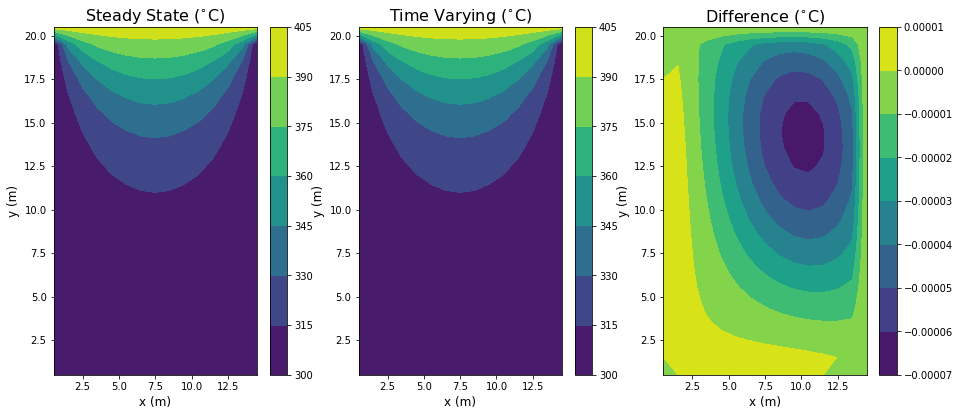

In [6]:
Diff = (theta-theta0)

fig = plt.figure(figsize=(6.4,6.4)) 
#Plot initial guess
ax1 = fig.add_subplot(131)
ax1.set_title( r'Steady State ($^{\circ}$C)',fontdict = {'size':16})
ax1.set_xlabel('x (m)',fontdict = {'size':12})
ax1.set_ylabel('y (m)',fontdict = {'size':12})
im1 = ax1.contourf(theta,origin = 'lower')
plt.colorbar(im1,ax=ax1)

#Plot temperature profile after Nt time steps
ax2 = fig.add_subplot(132)
ax2.set_title( r'Time Varying ($^{\circ}$C)',fontdict = {'size':16})
ax2.set_xlabel('x (m)',fontdict = {'size':12})
ax2.set_ylabel('y (m)',fontdict = {'size':12})
im2 = ax2.contourf(theta0, origin='lower')
plt.colorbar(im2,ax=ax2)

#Plot difference between plots
ax3 = fig.add_subplot(133)
ax3.set_title( r'Difference ($^{\circ}$C)',fontdict = {'size':16})
ax3.set_xlabel('x (m)',fontdict = {'size':12})
ax3.set_ylabel('y (m)',fontdict = {'size':12})
im3 = ax3.contourf(Diff, origin='lower')
plt.colorbar(im3,ax=ax3)

plt.subplots_adjust(right = 2)

### Conclusions

The steady state solution is equivalent to the bar system in its equilibrium state, i.e. when there is no more transfer of heat. The time varying solution is the temperature profile reached by the bar after 400 time steps from its initial state. In this case with $\zeta = 0.1$, the time varying system has reached the same equilibrium state as the steady state solution. For $\zeta = 0.1$ the difference between the two solutions is of order $10^{-5}$. Higher values of $\zeta$ result in larger differences.

Note that the offset of the centre of the contour for the difference is due to the $\omega$ parameter